**Predicting job Title**

In [1]:
# General Libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from itertools import product
import warnings
from tqdm import tqdm

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, modelling & evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,  accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
#pip install wordcloud

In [3]:
seek = pd.read_csv('final_data.csv')


In [4]:
seek.shape

(1437, 25)

In [5]:
seek.head()

,Salary Range,Link,Title,Listing Date,Expiry Date,Job Title,Job Teaser,Advertiser,Area,Work Type,...,Job Description,Strong Words,Location_few,new_job_title,new_category,exp_level,salary,final_salary,salary_type,final_salary_nona
0,0-70000,https://www.seek.com.au/job/40345298,Junior Data Scientist,2019-11-08T01:16:08.000Z,2019-12-08T12:59:59.000Z,Junior Data Scientist,JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTUNI...,Opus Recruitment Solutions,NaN,Full Time,...,JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTUNI...,['JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTU...,Sydney,data scientist,information_technology,1 Junior,$70000 - $80000 per annum,80000.0,year,80000.0
1,0-70000,https://www.seek.com.au/job/40369561,Quantitative Analyst / Data Scientist,2019-11-12T02:46:05.000Z,2019-12-12T12:59:59.000Z,Quantitative Analyst / Data Scientist,Exciting opportunity for an experienced Data S...,Ethos BeathChapman,"CBD, Inner West & Eastern Suburbs",Full Time,...,Data Scientist – Investment ManagementAre you ...,"['Data Scientist – Investment Management', 'Re...",Sydney,data scientist,accounting_services,2 Mid-Level,na,NaN,NaN,115000.0
2,0-70000,https://www.seek.com.au/job/40285384,Data Scientist,2019-10-31T00:31:30.000Z,2019-11-30T12:59:59.000Z,Data Scientist,Conduct innovative research by utilising state...,Swinburne University of Technology,CBD & Inner Suburbs,Full Time,...,"About the JobIn this exciting role, you could ...","['About the Job', 'About Swinburne University ...",Melbourne,data scientist,science_technology,2 Mid-Level,na,54000.0,year,54000.0
3,0-70000,https://www.seek.com.au/job/40285385,Data Scientist,2019-10-31T00:31:30.000Z,2019-11-30T12:59:59.000Z,Data Scientist,Conduct innovative research by utilising state...,Swinburne University of Technology,CBD & Inner Suburbs,Full Time,...,"About the JobIn this exciting role, you could ...","['About the Job', 'About Swinburne University ...",Melbourne,data scientist,science_technology,2 Mid-Level,na,54000.0,year,54000.0
4,0-70000,https://www.seek.com.au/job/40241958,Data Scientist,2019-10-24T15:25:27.000Z,2019-11-24T12:59:59.000Z,Data Scientist,Data Scientist Role with Deloitte Consulting ...,Deloitte,CBD & Inner Suburbs,Full Time,...,Salary packaging - to suit your personal and f...,"['About the team', '', 'What will your typical...",Melbourne,data scientist,information_technology,2 Mid-Level,na,NaN,NaN,140000.0


In [6]:
seek[['new_job_title', 'Job Description']].head(3)

,new_job_title,Job Description
0,data scientist,JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTUNI...
1,data scientist,Data Scientist – Investment ManagementAre you ...
2,data scientist,"About the JobIn this exciting role, you could ..."


In [7]:
seek[['Strong Words']]

,Strong Words
0,['JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTU...
1,"['Data Scientist – Investment Management', 'Re..."
2,"['About the Job', 'About Swinburne University ..."
3,"['About the Job', 'About Swinburne University ..."
4,"['About the team', '', 'What will your typical..."
5,['Are you passionate about Digital Transformat...
6,"['The ideal candidate will have:', 'Responsibi..."
7,"['Data Scientist', 'Gosford/Wyong', '3 Months ..."
8,"['About the business', 'About the role', 'Skil..."
9,"['Why you will love working there…', 'What you..."


Let's do NLP on job description

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [9]:
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [10]:
# Defining custom stop words

custom_stop_words = (['analytics', 'requirements', 'ability', 'duty', 'services', 'solutions', 'opportunity', 'new', 'key',
                     'client', 'ba', 'requirement', 'understand', 'scientist', 'engineer', 'science', 'use', 'tool',
                     'expertise', 'business', 'role', 'Statistician', 'data', 'work', 'project', 'therapy', 'forever', 'energyaustralia',
                     'capgemini', 'problem', 'machine', 'tableau', 'model', 'physical', 'perfect', 'ensure', 'people', 'interdependency', 'effectiveness'
                     'trade', 'background', 'eligibility'])
cloud_stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words


In [11]:
def wordcloud(title):
    descriptions = ''
    for i in list(seek[seek['Title'] == title]['Job Description'].index):
        descriptions += seek['Job Description'][i]

        wordcloud = WordCloud(stopwords = cloud_stop_words, max_font_size=50, max_words=15, background_color="yellow").generate(descriptions)
    plt.figure(figsize=(10, 6))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [12]:
from wordcloud import WordCloud

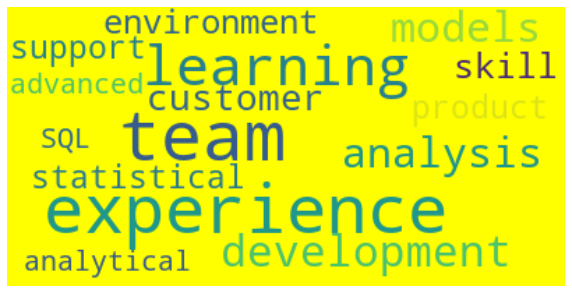

In [13]:
wordcloud('Data Scientist')

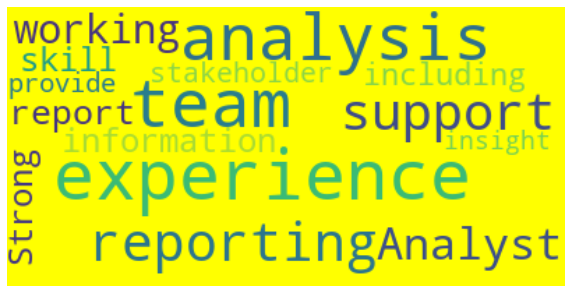

In [14]:
wordcloud('Data Analyst')

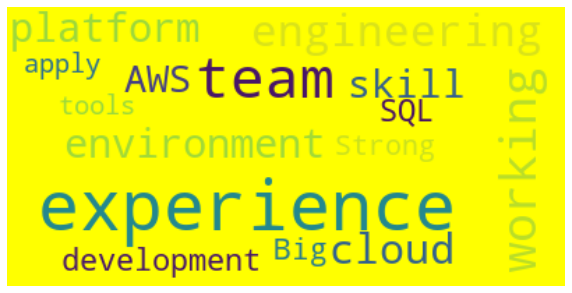

In [15]:
wordcloud('Data Engineer')

Comparing Data Analyst, Data Scientist and Data engineer job descriptions


**Preprocessing**

In [16]:
# Create the predictor and target matrices
X = seek['Job Description']
y = np.where(seek['Job Title'] == 'Data Scientist', 1, 0)

In [17]:
# Initialise TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 2, ngram_range = (1, 1), stop_words = cloud_stop_words)

# use TfidfVectorizer to create a document-term matrix from X
X_m = tfidf.fit_transform(X)

# convert the matrix into a dataframe
X_df = pd.DataFrame(X_m.todense(), columns=tfidf.get_feature_names())

In [18]:

# Create the train test splits
X_train, X_test, y_train, y_test = train_test_split(X_df, 
                     y, test_size=0.2, random_state=42)

In [19]:
# Inspect shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1149, 8253)
(288, 8253)
(1149,)
(288,)


**MODELLING**

In [20]:
max(y.mean(), 1 - y.mean())

0.9665970772442589

Baseline: 97% 

**Classification Model**


Logistic Regression

In [21]:
lr =  LogisticRegression()

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-2, 2, 20),
    'solver':['liblinear']
}

lr_gs = GridSearchCV(lr, lr_params, cv=3, verbose=1)
lr_gs.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
       

In [22]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)
print(lr_gs.score(X_test, y_test))



{'C': 8.858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}
0.9738903394255874
0.9583333333333334


Decission Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
DTC = DecisionTreeClassifier()
dtc_params = {
    'max_depth':[None,1,2,3,4, 5],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[11, 12, 13, 14,15,16, 17, 18, 19, 20]
}

dtc_gs = GridSearchCV(DTC, dtc_params, n_jobs=-1, cv=3, verbose=1)
dtc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   45.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5],


In [25]:
dtc_best = dtc_gs.best_estimator_
print((dtc_gs.best_params_))
print((dtc_gs.best_score_))
print(dtc_gs.score(X_test, y_test))

{'max_depth': 1, 'max_features': None, 'min_samples_split': 11}
0.9712793733681462
0.9548611111111112


In [26]:
from functools import lru_cache
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

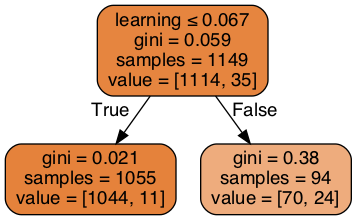

In [27]:

# # initialize the output file object
dot_data = StringIO() 

# # my fit DecisionTreeRegressor object here is: dtr1
# # for feature_names i put the columns of my Xr matrix
export_graphviz(dtc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                 feature_names=X_train.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Machine learning is important feature importance in Data Scientist role